<a href="https://colab.research.google.com/github/ferit-qc/lab2/blob/main/lab2_basicquantumcomputingalgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab2. Implementation of Basic Quantum Computing Algorithms: Superdense Coding, Teleporation, Deutsch-Jozsa, Bernstein-Vazarani, Simon


## Useful learning resources and links:
* [Quantum computing documentation](https://docs.quantum.ibm.com/)
* [Qiskit documentation](https://www.ibm.com/quantum/qiskit)
* [IBM Quantum Composer](https://quantum.ibm.com/composer)


Lets first install everything we need for this excersise:

In [1]:
pip install qiskit qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130

In [2]:
pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.1 MB/s eta 0:00:00


In [3]:
pip install matplotlib

In [4]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=58c4e32898b2dac02cdf54d62806e1ec26314aef82da5a6d76f32cbbab7e0956
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [5]:
from qiskit import *   # Imports core Qiskit classes (QuantumCircuit, transpile, etc.)
from qiskit_aer.aerprovider import AerSimulator # Provides access to the local quantum circuit simulator
from qiskit.visualization import plot_histogram # Enables visualization of measurement results
import matplotlib.pyplot as plt # Standard Python plotting library
from IPython.display import display # Allows rich display of plots in Jupyter notebooks
from IPython.display import Image
from IPython.core.display import HTML
import math
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
import numpy as np



---



## 1. 1. Superdense Coding and Teleportation

Superdense coding is a quantum communication protocol that allows the transmission of **two classical bits of information** by sending **only one qubit**, using the power of quantum entanglement. In this protocol, two parties (commonly named Alice and Bob) initially share an entangled pair of qubits. To send two classical bits, Alice applies one of four possible quantum gates (I, X, Z, or XZ) to her qubit based on the message she wants to transmit. She then sends her qubit to Bob, who performs a **Bell basis measurement** on the two qubits to retrieve the two-bit message. This protocol demonstrates the potential of quantum communication to exceed classical limits by leveraging entanglement as a resource.

![AliceBob.png](<https://media-hosting.imagekit.io/c1af65b3de5748ff/AliceBob.png?Expires=1837852304&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=zifALhJAjIUQmzW536jlZSTCIIO73~qvGnWzN9~kv2uah0q-lSA7CNe0ag3alfib3Iz-GbUK9p5wNsmviwTisDDgBoVxnjnXR1kOyT-EOAjhNVAaqk9goGgCndDFLbZ1R1a9BHQxyNElilprcx57aNILLWDwa~dP2eTVa1A3hpNDBxLqxGABJQBnHInQPb9YgJpMlyHWPZxhqG6MX91cMIL-bUyFAkrlQo-RXaPVw5n42Twvoyu-tXNxKUv4AcM~2Xj47Uw1lAQ24LHxkGE27kX3-FXp6ZnUaiTdwR1OHCPQmoLFboAQMDOwi63iKU4ZCfBM1g7x1iENCE2CJ0fBZg__>)





## 1. 2. The Process

### 1.2.1. Step 1
The process starts with a third party, who we'll call Eve. Two qubits are prepared by Eve in an entangled state. She initially starts the 2 qubits in the basis state $|0\rangle$. She applies Hadamard gate ($H$) to the first qubit to create superposition. She then applies CNOT gate ($CX$) using the first qubit as a control and the second as the target. This is the entangled state (Bell pair) we mentioned earlier.

#### Outcome States

We start in the state:

$$|00\rangle = |0\rangle_A\otimes |0\rangle_B$$

where the qubit to be sent to Alice is labeled with $A$ and the qubit to be sent to Bob is labeled $B$. Eve first applies a Hadamard gate to the first qubit, which creates superposition and we get the state:


$$|+0\rangle  =  \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$

Then Eve applies the CNOT gate. The CNOT gate entangles both qubits, i.e. it flips the target if the control is $|1\rangle$. Note that the control qubit is our leftmost qubit.


$$\text{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

### 1.2.2. Step 2 <a id='step2'></a>

Eve sends the first qubit to Alice and the second qubit to Bob. The goal of the protocol is for Alice to send 2 classical bits of information to Bob using her qubit. But before she does, she needs to apply a set of quantum gates to her qubit depending on the 2 bits of information she wants to send:


#### Encoding Rules for Superdense Coding (Alice protocol):
<table>
    <tr>
        <th>Intended Message</th>
        <th>Applied Gate</th>
        <th>Resulting State ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
    </tr>
    <tr>
        <td>00</td>
        <td>$I$</td>
        <td>$|00\rangle + |11\rangle$</td>
    </tr>
    <tr>
        <td>01</td>
        <td>$X$</td>
        <td>$|10\rangle + |01\rangle$</td>
    </tr>
    <tr>
        <td>10</td>
        <td>$Z$</td>
        <td>$|00\rangle - |11\rangle$</td>
    </tr>
    <tr>
        <td>11</td>
        <td>$ZX$</td>
        <td>$-|10\rangle + |01\rangle$</td>
    </tr>
</table>

Thus if she wants to send a `00`, she does nothing to her qubit (apply the identity ($I$) gate). If she wants to send a `01`, then she applies the $X$ gate. Depending on what she wants to send, she applies the appropriate gate, then sends her qubit to Bob for the final step in the process.


### 1.2.3. Step 3 <a id='step3'></a>

Bob receives Alice's qubit (leftmost qubit) and uses his qubit to decode Alice's message. Notice that he does not need to have knowledge of the state in order to decode it — he simply uses the restoration operation.

Bob applies a CNOT gate using the leftmost qubit as control and the rightmost as target. Then he applies a Hadamard gate and finally performs a measurement on both qubits to extract Alice's message.

<table>
    <tr>
        <th>Bob Receives ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After CNOT-gate ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After H-gate</th>
    </tr>
    <tr>
        <td>$|00\rangle + |11\rangle$</td>
        <td>$|00\rangle + |10\rangle$</td>
        <td>$|00\rangle$</td>
    </tr>
    <tr>
        <td>$|10\rangle + |01\rangle$</td>
        <td>$|11\rangle + |01\rangle$</td>
        <td>$|01\rangle$</td>
    </tr>
    <tr>
        <td>$|00\rangle - |11\rangle$</td>
        <td>$|00\rangle - |10\rangle$</td>
        <td>$|10\rangle$</td>
    </tr>
    <tr>
        <td>$-|10\rangle + |01\rangle$</td>
        <td>$-|11\rangle + |01\rangle$</td>
        <td>$|11\rangle$</td>
    </tr>
</table>



## 1. 3. Simulating the Superdense Coding Protocol <a id='simulating'></a>

We saw that to create an entangled pair, we needed to do a H-gate followed by a CNOT. Let's create a function that takes a `QuantumCircuit` and entangles the qubits with indices `a` and `b`:

In [6]:
def create_bell_pair():
    """
    Reurns:
        QuantumCircuit: that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

### 1.3.1. Message Encoding Function

Next we need to encode our message. We saw that there were four possible messages we could send: `00`, `10`, `01` or `11`.

The `encode_message` function implements the **encoding step** of the *superdense coding* protocol by applying quantum gates to encode a **two-bit classical message** into a single qubit of an entangled pair. The function takes a `QuantumCircuit`, the index of the qubit to modify (typically the qubit held by Alice), and a two-character binary string `msg` (e.g., `"10"`). Depending on the message, it conditionally applies **Pauli gates**: an `X` gate (bit-flip) if the second bit is `'1'`, and a `Z` gate (phase-flip) if the first bit is `'1'`. These operations transform the shared entangled state into one of the four Bell states, each uniquely corresponding to a two-bit message. The function also includes input validation to ensure that the message is exactly two bits and consists only of `'0'` and `'1'`. When decoded, the resulting state will allow the receiver (Bob) to recover the original two-bit message.


Let's create a function that takes this message and applies the appropriate gates for us:

In [7]:
def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

Finally, we need to decode our message, we saw we could do this using a CNOT followed by a H-gate. Let's create a function that does this for us too:

In [8]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

Finally, we can put this together to complete our protocol.

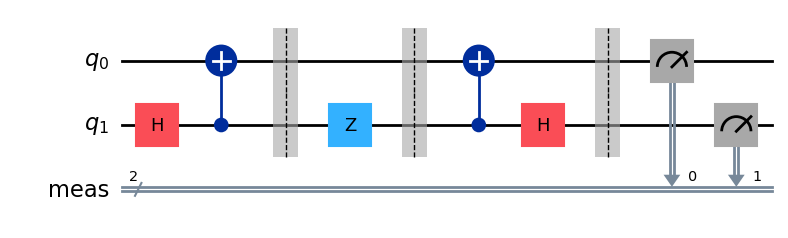

In [11]:
# Eve creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'   #change here to se efect
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
#qc.draw()
qc.draw(output = 'mpl')

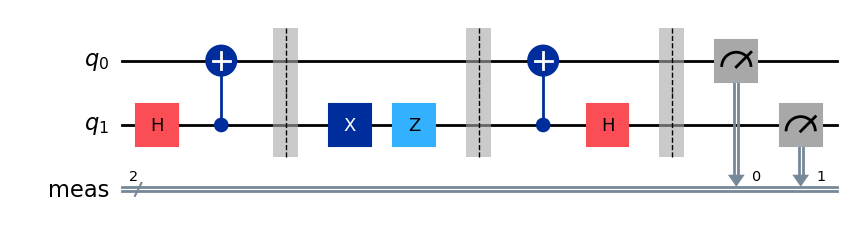

In [13]:
# Eve creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '11'   #change here to se efect
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
#qc.draw()
qc.draw(output = 'mpl')

**Task: Change value of message to $00$, $01$ $11$. Comment on how it changes circuit. and write your obervations here:**

### 1.3.2. Visualizing Our Measurements

Measurement Counts: {'11': 1024}


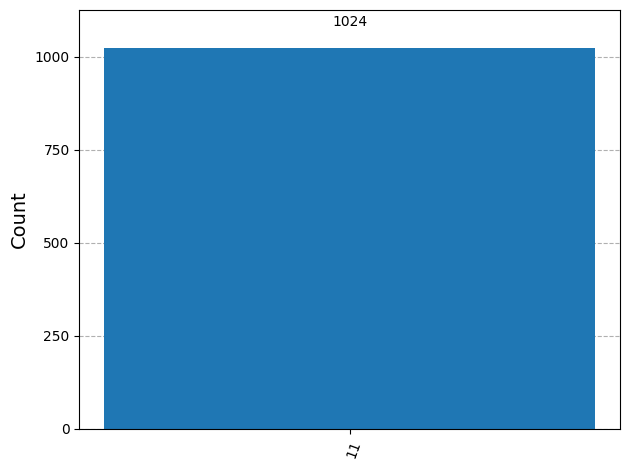

In [14]:
# Create simulator instance
# Think of this as your “virtual quantum computer” to test your circuit.
simulator = AerSimulator()
# Transpile the circuit for the simulator
compiled_qc = transpile(qc, simulator)
# Runs the transpiled circuit on the simulator
result = simulator.run(compiled_qc, shots=1024).result()
# Get measurement counts
counts = result.get_counts()
# Show the result
print("Measurement Counts:", counts)
#Plots a histogram of how often each result was observed.
hist = plot_histogram(counts)
display(hist)

The encoding step in superdense coding can technically be done using other combinations of quantum gates, as long as the mapping between 2-bit classical messages and the 4 Bell states remains unique and decodable.





## 1.4. The Difference between Superdense Coding and Quantum Teleportation

Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.

**Superdense coding** is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

**Quantum teleportation** is a process by which the state of qubit ($|\psi\rangle$) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement.


| Teleportation                                     | Superdense Coding                                    |
|:-------------------------------------------------:|:----------------------------------------------------:|
| Transmit one<br>qubit using two<br>classical bits | Transmit two<br>classical bits<br>using one<br>qubit |


The teleportation protocol can be thought of as a flipped version of the superdense coding protocol, in the sense that Alice and Bob merely “swap their equipment.”



---



## 2. Quantum Teleportation

Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$.
This entails passing on information about $\alpha$ and $\beta$ to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of $\vert\psi\rangle$ and give the copy to Bob. We can only copy classical states (not superpositions).

However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state $\vert\psi\rangle$ to Bob. We call this teleportation because, at the end, Bob will have $\vert\psi\rangle$ and Alice won't anymore.

## 2. 1. The Quantum Teleportation Protocol <a id='how'></a>
To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.

![teleportation_doodle](https://media-hosting.imagekit.io/0c67dfab914d43b5/QuantumTeleportation.png?Expires=1837875771&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=PnKhUn63FG4rYHxzzaCBC-rgr2BjesqXDGgs~Tnh6s1cXLu9f0sr8KIsx-kZFYLX3zAz7TN48SbDopwau9NX4FuKpm8607xVnp6r5Vn7YjMw5oGDWKE8-cOtUrCffnxWsbiR9yqdT4Fe3yHEY22NpkllOGdgpKjUlIzNu2F6qXGVDnoto~RqMD-wfoJpo5I62zqBo6cjEv4yTyqqok-2RRuCEwQQv9-Oyw5x5pFEUwvaPQiNZTTvdCmkVPXRijsKHyGIoNwLfuU2GylPcwwXGhgPOTPj9H9k2a1PkeYePhpI~zyHPf5-KHi2Ka8yGu467D~2tviMLqYVPhz5mvLtGA__)


We will describe the steps on a quantum circuit below. Here, no qubits are actually ‘sent’, you’ll just have to imagine that part!



### 2.2. Understanding Quantum Teleportation

#### 2.2.1. Step 1

Quantum Teleportation begins with the fact that Alice needs to transmit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ (a random qubit) to Bob. She doesn't know the state of the qubit. For this, Alice and Bob take the help of a third party (Telamon). Telamon prepares a pair of entangled qubits for Alice and Bob. The entangled qubits could be written in Dirac Notation as:

$$ |e \rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

Alice and Bob each possess one qubit of the entangled pair (denoted as A and B respectively),

$$|e\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B) $$

This creates a three qubit quantum system where Alice has the first two qubits and Bob the last one.

$$ \begin{aligned}
|\psi\rangle \otimes |e\rangle &= \frac{1}{\sqrt{2}} (\alpha |0\rangle \otimes (|00\rangle + |11\rangle) + \beta |1\rangle \otimes (|00\rangle + |11\rangle))\\
&= \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|100\rangle + \beta|111\rangle)
\end{aligned}$$

#### 2.2.2. Step 2

Now according to the protocol Alice applies CNOT gate on her two qubits followed by Hadamard gate on the first qubit. This results in the state:

$$
\begin{aligned} &(H \otimes I \otimes I) (CNOT \otimes I) (|\psi\rangle \otimes |e\rangle)\\
&=(H \otimes I \otimes I) (CNOT \otimes I) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|100\rangle + \beta|111\rangle) \\
&= (H \otimes I \otimes I) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|110\rangle + \beta|101\rangle) \\
&= \frac{1}{2}  (\alpha(|000\rangle + |011\rangle + |100\rangle + |111\rangle) + \beta(|010\rangle + |001\rangle - |110\rangle - |101\rangle)) \\
\end{aligned}
$$

Which can then be separated and written as:

$$
\begin{aligned}
= \frac{1}{2}(
 & \phantom{+} |00\rangle (\alpha|0\rangle + \beta|1\rangle) \hphantom{\quad )} \\
 & + |01\rangle (\alpha|1\rangle + \beta|0\rangle) \hphantom{\quad )}\\[4pt]
 & + |10\rangle (\alpha|0\rangle - \beta|1\rangle) \hphantom{\quad )}\\[4pt]
 & + |11\rangle (\alpha|1\rangle - \beta|0\rangle) \quad )\\
\end{aligned}
$$

#### 2.2.3. Step 3

Alice measures the first two qubit (which she owns) and sends them as two classical bits to Bob. The result she obtains is always one of the four standard basis states $|00\rangle, |01\rangle, |10\rangle,$ and $|11\rangle$ with equal probability.  

On the basis of her measurement, Bob's state will be projected to,
$$
|00\rangle \rightarrow (\alpha|0\rangle + \beta|1\rangle)\\
|01\rangle \rightarrow (\alpha|1\rangle + \beta|0\rangle)\\
|10\rangle \rightarrow (\alpha|0\rangle - \beta|1\rangle)\\
|11\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)
$$

#### 2.2.4. Step 4

Bob, on receiving the bits from Alice, knows he can obtain the original state $|\psi\rangle$ by applying appropriate transformations on his qubit that was once part of the entangled pair.

The transformations he needs to apply are:

$$
\begin{array}{c c c}
\mbox{Bob's State}                 & \mbox{Bits Received} & \mbox{Gate Applied} \\
(\alpha|0\rangle + \beta|1\rangle) & 00                   & I                   \\
(\alpha|1\rangle + \beta|0\rangle) & 01                   & X                   \\
(\alpha|0\rangle - \beta|1\rangle) & 10                   & Z                   \\
(\alpha|1\rangle - \beta|0\rangle) & 11                   & ZX
\end{array}
$$

After this step Bob will have successfully reconstructed Alice's state.

First, lets create our quantum circuit:

#### 2.2.1. Step 1
A third party, Eve, creates an entangled pair of qubits and gives one to Bob and one to Alice.

The pair Eve creates is a special pair called a Bell pair. In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the X-basis ($|+\rangle$ and $|-\rangle$) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis.

In [15]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

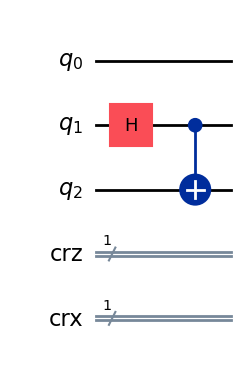

In [16]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
# In our case, Eve entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw(output='mpl')

Let's say Alice owns $q_1$ and Bob owns $q_2$ after they part ways.

#### 2.2.2. Step 2

Alice applies a CNOT gate to $q_1$, controlled by $\vert\psi\rangle$ (the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to $|\psi\rangle$. In our quantum circuit, the qubit ($|\psi\rangle$) Alice is trying to send is $q_0$:

In [17]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

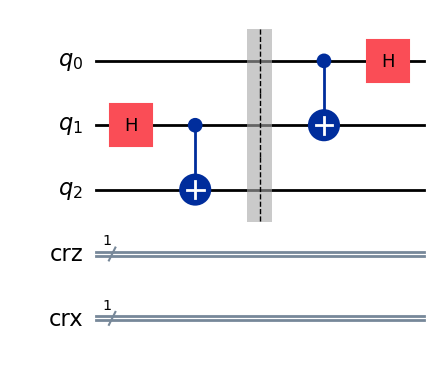

In [18]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='mpl')

#### 2.2.3. Step 3

Next, Alice applies a measurement to both qubits that she owns, $q_1$ and $\vert\psi\rangle$, and stores this result in two classical bits. She then sends these two bits to Bob.

In [19]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

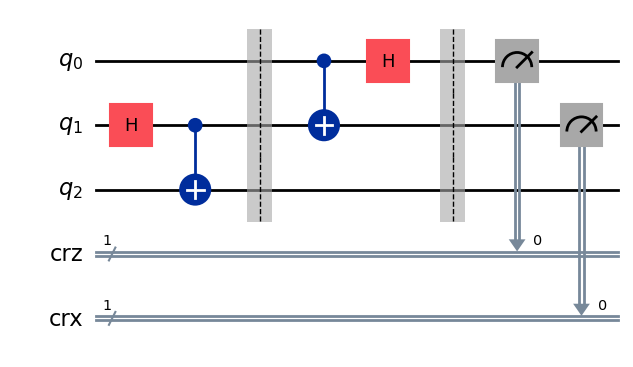

In [20]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw(output='mpl')

#### 2.2.4. Step 4

Bob, who already has the qubit $q_2$, then applies the following gates depending on the state of the classical bits:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

(*Note that this transfer of information is purely classical*.)

In [32]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    with qc.if_test((crz, 1)):
      qc.z(qubit)
    with qc.if_test((crx, 1)):
      qc.x(qubit)

    #qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
    #qc.z(qubit).c_if(crz, 1) # are in the state '1'

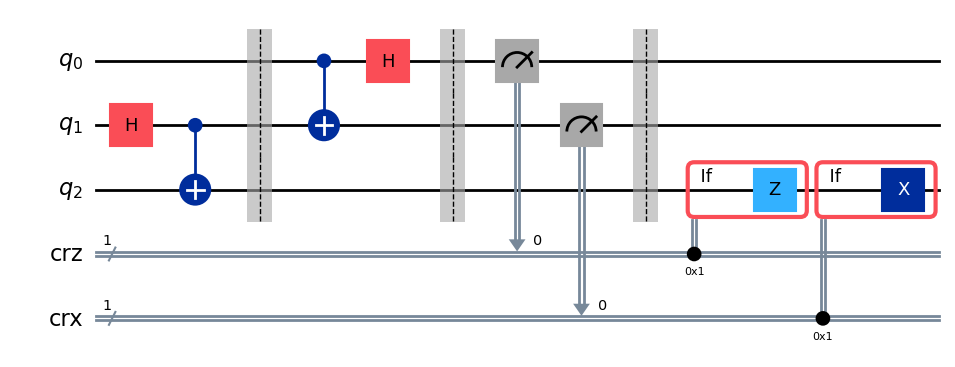

In [33]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw(output='mpl')

And voila! At the end of this protocol, Alice's qubit has now teleported to Bob. Now, notice how we only constucted this circuit, we did not use any measurements at the end. In the following section we will see how we can confirm that qubits are really sent.

### 2.3. How Will We Test the Protocol on a Quantum simulator?

 We will initialize Alice's qubit in a random state $\vert\psi\rangle$. This state will be created using an `Initialize` gate on $|q_0\rangle$. In this chapter we use the function `random_statevector` to choose `psi` for us, but feel free to set `psi` to any qubit state you want.

<IPython.core.display.Latex object>

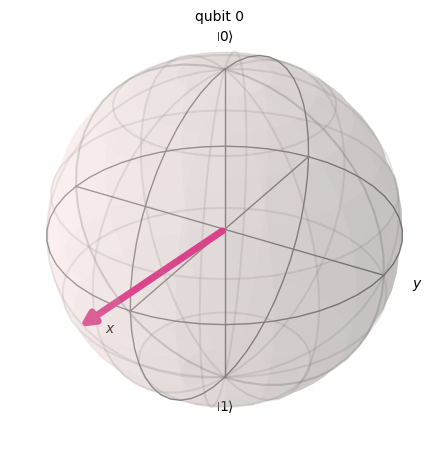

In [36]:
qasm_simulator = AerSimulator()
statevector_simulator = AerSimulator(method='statevector')

# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

Let's create our initialization instruction to create $|\psi\rangle$ from the state $|0\rangle$:

In [37]:
from qiskit.circuit.library import Initialize

In [38]:
init_gate = Initialize(psi)
init_gate.label = "init"

(Initialize is technically not a gate since it contains a reset operation, and so is not reversible. We call it an 'instruction' instead). If the quantum teleportation circuit works, then at the end of the circuit the qubit  |q2⟩  will be in this state. We will check this using the statevector simulator.

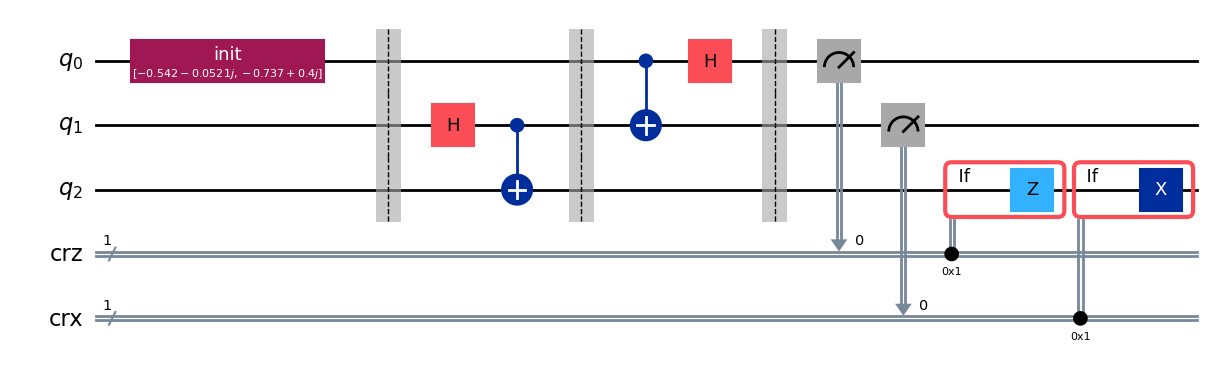

In [39]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw(output='mpl')

We can see below, using the statevector obtained from the aer simulator, that the state of $|q_2\rangle$ is the same as the state $|\psi\rangle$ we created above, while the states of $|q_0\rangle$ and $|q_1\rangle$ have been collapsed to either $|0\rangle$ or $|1\rangle$. The state $|\psi\rangle$ has been teleported from qubit 0 to qubit 2.

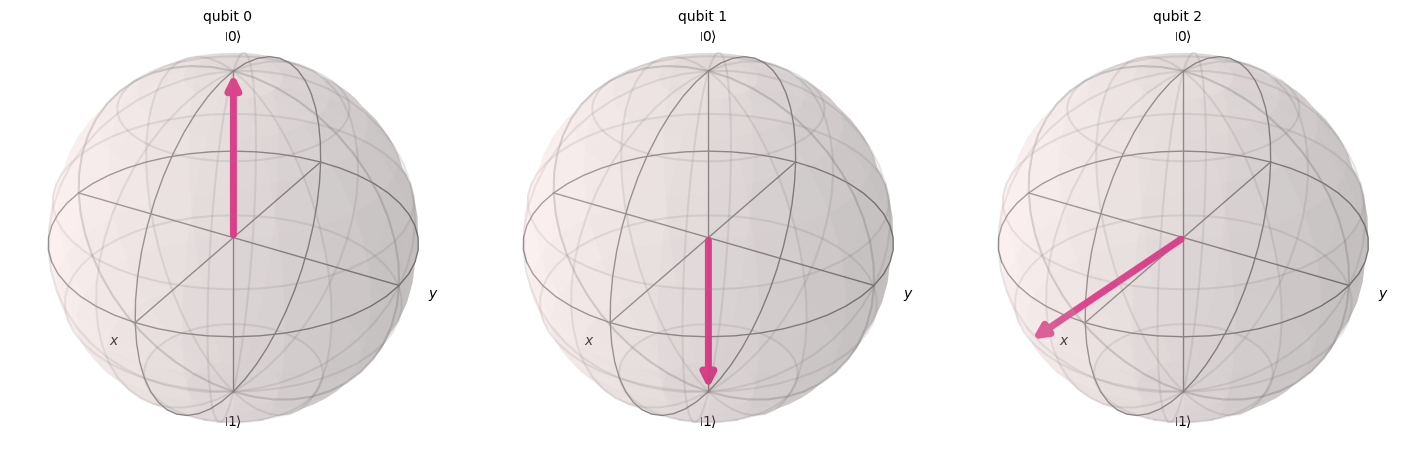

In [40]:
sim = AerSimulator()
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

You may notice that the qubits 0 & 1 change states, but qubit 2 is always in the state $|\psi\rangle$.

### 2.4. Using the Simulated Counts

Quantum teleportation is designed to send qubits between two parties. We do not have the hardware to demonstrate this, but we can demonstrate that the gates perform the correct transformations on a single quantum chip. Here we again use the aer simulator to simulate how we might test our protocol.

On a real quantum computer, we would not be able to sample the statevector, so if we wanted to check our teleportation circuit is working, we need to do things slightly differently. The `Initialize` instruction first performs a reset, setting our qubit to the state $|0\rangle$. It then applies gates to turn our $|0\rangle$ qubit into the state $|\psi\rangle$:

$$ |0\rangle \xrightarrow{\text{Initialize gates}} |\psi\rangle $$

Since all quantum gates are reversible, we can find the inverse of these gates using:

In [41]:
inverse_init_gate = init_gate.gates_to_uncompute()

This operation has the property:

$$ |\psi\rangle \xrightarrow{\text{Inverse Initialize gates}} |0\rangle $$

To prove the qubit $|q_0\rangle$ has been teleported to $|q_2\rangle$, if we do this inverse initialization on $|q_2\rangle$, we expect to measure $|0\rangle$ with certainty. We do this in the circuit below:

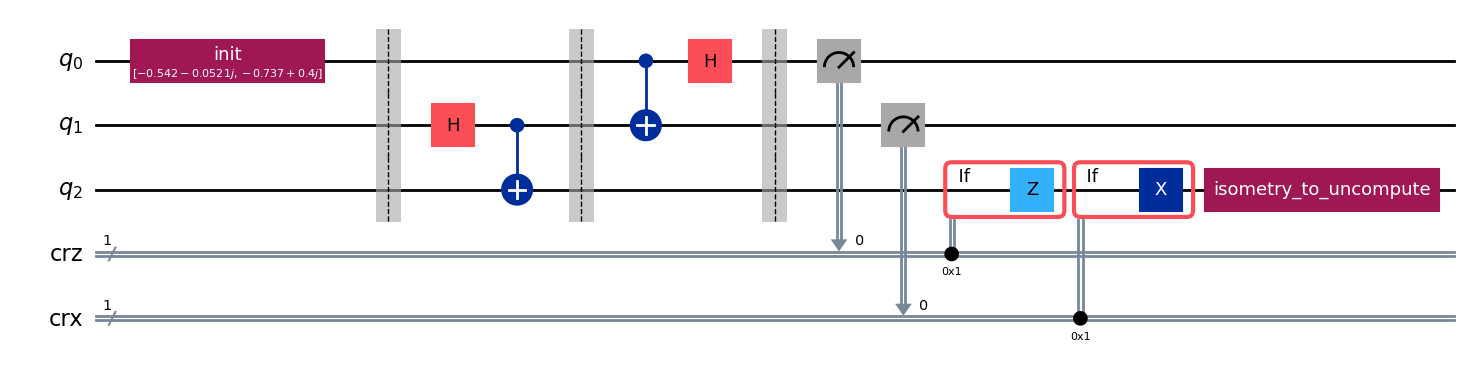

In [42]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw(output='mpl')

We can see the `inverse_init_gate` appearing, labelled 'disentangler' on the circuit diagram. Finally, we measure the third qubit and store the result in the third classical bit:

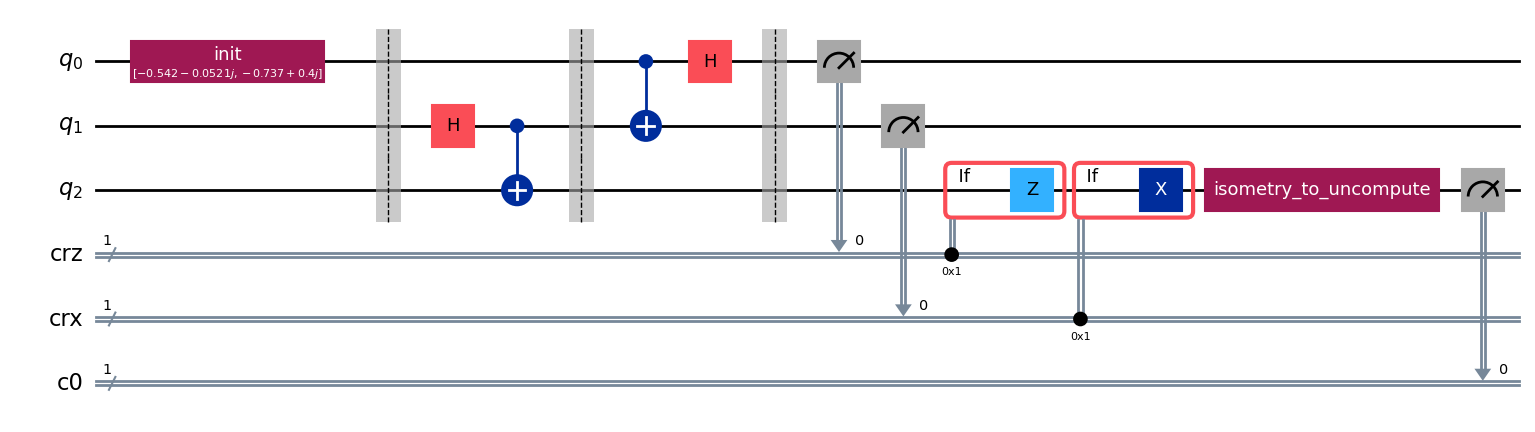

In [43]:
# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw(output='mpl')

and we run our experiment:

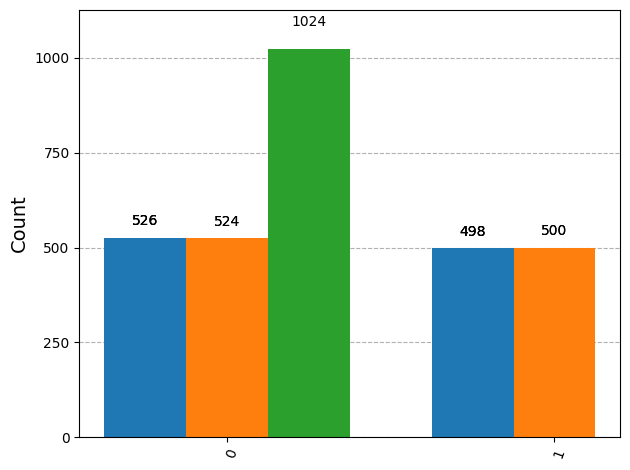

In [44]:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

**Task. Coment on which qubit has 100% chance of measurement? Write your comment here:**



---



## 3. Deutsch-Jozsa Algorithm



The Deutsch-Jozsa algorithm, was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.

Note that the Deutsch-Jozsa problem is an $n$-bit extension of the single bit Deutsch problem.

### 3.1. The Classical Solution <a id='classical-solution'> </a>

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$, is balanced:
e.g. if we get both $f(0,0,0,...)\rightarrow 0$ and $f(1,0,0,...) \rightarrow 1$, then we know the function is balanced as we have obtained the two different outputs.  

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is $2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9^\textrm{th}$ input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:

$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 < k \leq 2^{n-1}$$

Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

### 3.2. Quantum Solution <a id='quantum-solution'> </a>

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below is the generic circuit for the Deutsch-Jozsa algorithm.

![screenshot_1743281965653.png](<https://media-hosting.imagekit.io/9768b51ae86346bf/screenshot_1743281965653.png?Expires=1837889965&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=lxISKdb0DCRKVSKbhGxca8pTpmk6lS0y5fmj~LNQx0jrkmjVOcKnUlmRdUE4qWUi-iq~vjMFbMo~m5mrFN27ylg3xgTnS1uA1N1tgLhhb~nxSbAif4DzyYly4pklLTP2kS6wErvdAYPEuFQrSDmbxVAhWFEB5vYcqk2fMdx27H2fGzmY0p3h~CB-rmCrvbtInogF0x60qy5p6tihLUl0-R5mWk~7WO8GPu5OTTDaAcNJ2SSzZWCfxylMVbp8kHHlRUFZHJ2I1UTtx21~4b7zovmHbK3NS4FJkiCpKOfROIULPQ-i4084Sj9Z-uSXxuJH0A8Fv1zDOiDPcKj7SHKu3g__>)

Now, let's go through the steps of the algorithm:

1. Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0\rangle$, and the second is a one-qubit register initialized to $|1\rangle$:
        
   $$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$

2. Apply a Hadamard gate to each qubit:
        
   $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$

3. Apply the quantum oracle $\vert x\rangle \vert y\rangle$ to $\vert x\rangle \vert y \oplus f(x)\rangle$:
   $$
   \begin{aligned}
   \lvert \psi_2 \rangle  
   & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\  
   & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle )
   \end{aligned}
   $$
       
   since for each $x,f(x)$ is either $0$ or $1$.

4. At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:
    $$
    \begin{aligned}
        \lvert \psi_3 \rangle
            & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y}
                \vert y \rangle \right] \\
            & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                \vert y \rangle
    \end{aligned}
    $$
       
   where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.

5. Measure the first register. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced.


### 3.3. Why Does This Work?

- **Constant Oracle**

When the oracle is *constant*, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00\dots 0\rangle$ in the first register.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
=
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{after } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
$$

- **Balanced Oracle**

After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is *balanced*, phase kickback adds a negative phase to exactly half these states:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
=
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|00\dots 0\rangle$. This means we should never measure the all-zero state.




## 3.2. Example of Deutsch-Jozsa Algorithm

Let's go through a specific example for a two bit balanced function:

Consider a two-bit function $f(x_0,x_1)=x_0 \oplus x_1$ such that

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

The corresponding phase oracle of this two-bit oralce is $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

We will now check if this oracle works as expected by taking a example state
$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

1. The first register of two qubits is initialized to $|00\rangle$ and the second register qubit to $|1\rangle$
        
   (Note that we are using subscripts 0, 1, and 2 to index the qubits. A subscript of "01" indicates the state of the register containing qubits 0 and 1)

   $$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

2. Apply Hadamard on all qubits
   
   $$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  $$

3. The oracle function can be implemented as $\text{Q}_f = CX_{02}CX_{12}$,
   $$
   \begin{aligned}
   \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right)_{2} \\
       + \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right)_{2} \\
       + \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right)_{2} \\
       + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{2} \right]
   \end{aligned}
   $$

4. Simplifying this, we get the following:
   $$
   \begin{aligned}
   \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\
       & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\
       & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}
   \end{aligned}
   $$

5. Apply Hadamard on the first register
   
   $$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$

6. Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.

## 3.3. Creating Quantum Oracles

Let's see some different ways we can create a quantum oracle.

For a constant function, it is simple:

1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.  
2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.

For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

![screenshot_1743282197599.png](<https://media-hosting.imagekit.io/184a75b2f67441cc/screenshot_1743282197599.png?Expires=1837890197&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=J5y2GaFqlGiuv0BnVm8EueQ3MUUgXcj-OQNxpB1W5KW67cxvdHBcAO7svcS4GmeuT8VJU4Sq74nfYutsmIgad1h6icufZY2FiPbO5OU3dLyfqEz5B134ci~AG97B3e5nrOAQaMLxFASUP-A1jLJkKb-5n0C0vbFRVs7bIxhseWu-~q0ZmnW7IyYSZYz-lEfoThbZj7eYBNkkHQ8P9Q-tb5sSniKjwWGjfEbcCnOzDEfByO2fGy89PgNuXYysitk3N33W4bZATC8hwEm9yDW5OXhpXIlRQUSQ8XbH3AAFIfcZhCiUw6b1h44eGtsVOsdm4F95OrI6Ad-W7C~9m6m2hQ__>)

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:

| Input states that output 0 | Input States that output 1 |
|:--------------------------:|:--------------------------:|
|             000            |             001            |
|             011            |             100            |
|             101            |             010            |
|             110            |             111            |


We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:

![screenshot_1743282216569.png](<https://media-hosting.imagekit.io/8ef58bb404ca46e4/screenshot_1743282216569.png?Expires=1837890216&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=WLTaCDSJv1UbsyH4fk3mI9ob42j9V1Cr0yVhGqT3CDkmetG6~hhdqb-l9Ontv0dD2S9J-cp6FiMetFi6p4Zqo4uZt5qtqBTQiFcEI9e-JzVV7WWAPBfcAaoCRbcH7KyzzPVFpHhH7G8WIZByyt77mGIIrz1YFz3O5lLrZXjrQVuayjOddwmlAv0y6GzC-4-Aqs8YJnwNGuQdfpHM26to1RmISrg2yJpHwuJh8CeIdb408IDo5V62HNLU8BDgqNByU~0QEhf7ZnkzQBuC4kJ73YTWSgKfT~vyGSM3j2X3-N8h7gKYOfLDM4HMkACZBMGwPEqD7X2OdlhP81yiC-qQpA__>)

| Input states that output 0 | Input states that output 1 |
|:--------------------------:|:--------------------------:|
|             001            |             000            |
|             010            |             011            |
|             100            |             101            |
|             111            |             110            |

## 3.4. Qiskit Implementation

We now implement the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles. First, we set the size of the input register for our oracle:





In [45]:
# set the length of the n-bit input string.
n = 3

Let's start by creating a constant oracle, in this case the input has no effect on the output so we just randomly set the output qubit to be 0 or 1:

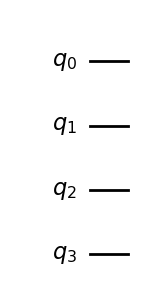

In [46]:
# set the length of the n-bit input string.
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw(output='mpl')

After that, we create balanced oracle:

In [47]:
balanced_oracle = QuantumCircuit(n+1)

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. Let's first choose a binary string of length `n` that dictates which controls to wrap:

In [48]:
b_str = "101"

Now we have this string, we can use it as a key to place our X-gates. For each qubit in our circuit, we place an X-gate if the corresponding digit in `b_str` is `1`, or do nothing if the digit is `0`.

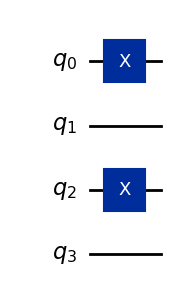

In [49]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw(output='mpl')

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

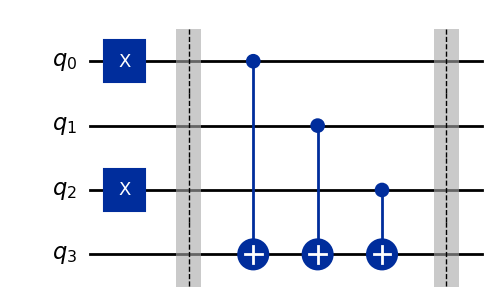

In [50]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw(output='mpl')

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates:

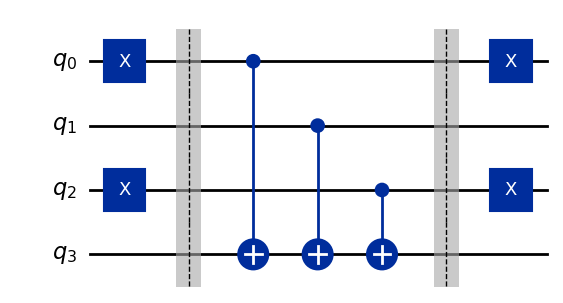

In [51]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw(output='mpl')

We have just created a balanced oracle! All that's left to do is see if the Deutsch-Jozsa algorithm can solve it.

## 3.5. The Full Deutsch-Jozsa Algorithm

Let's now put everything together. This first step in the algorithm is to initialize the input qubits in the state $|{+}\rangle$ and the output qubit in the state $|{-}\rangle$:

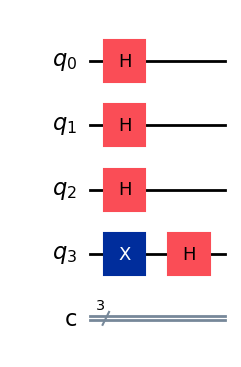

In [52]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw(output='mpl')

Next, let's apply the oracle. Here we apply the `balanced_oracle` we created above:

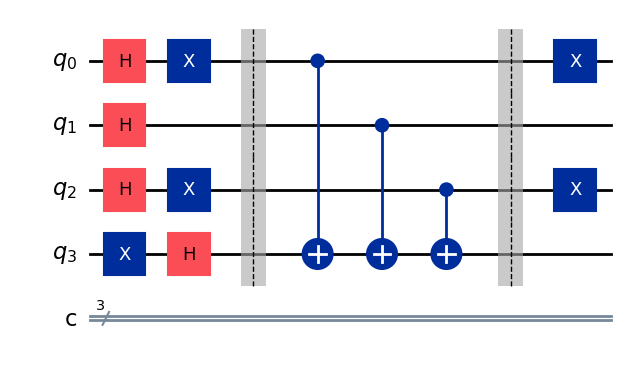

In [53]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw(output='mpl')

Finally, we perform H-gates on the $n$-input qubits, and measure our input register:

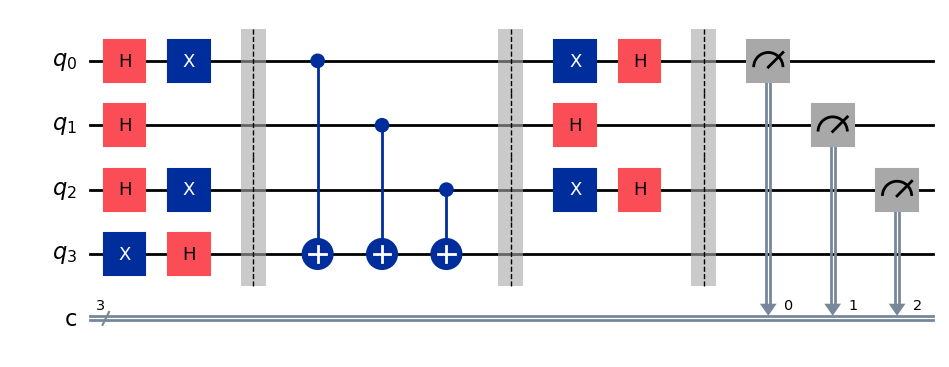

In [54]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw(output='mpl')

Let's see the output:

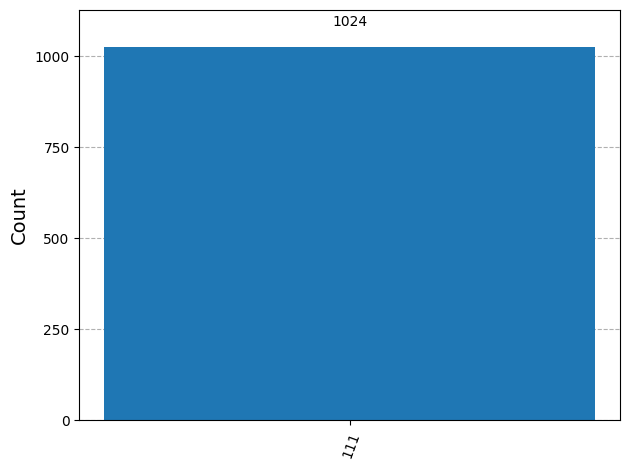

In [55]:
# use local simulator
aer_sim = AerSimulator()
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [56]:
# ...we have a 0% chance of measuring 000.
assert answer.get('000', 0) == 0

We can see from the results above that we have a 0% chance of measuring `000`. This correctly predicts the function is balanced.

### 3.5.1. Generalised Circuits

Below, we provide a generalised function that creates Deutsch-Jozsa oracles and turns them into quantum gates. It takes the `case`, (either `'balanced'` or '`constant`', and `n`, the size of the input register:

In [57]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Let's also create a function that takes this oracle gate and performs the Deutsch-Jozsa algorithm on it:

In [58]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit

Finally, let's use these functions to play around with the algorithm:

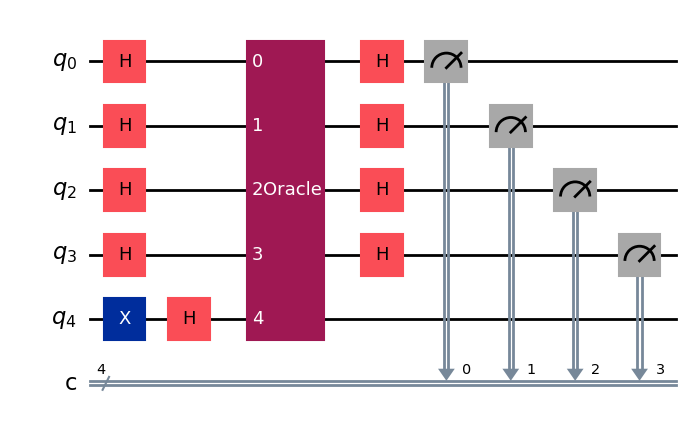

In [59]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output='mpl')

And see the results of running this circuit:

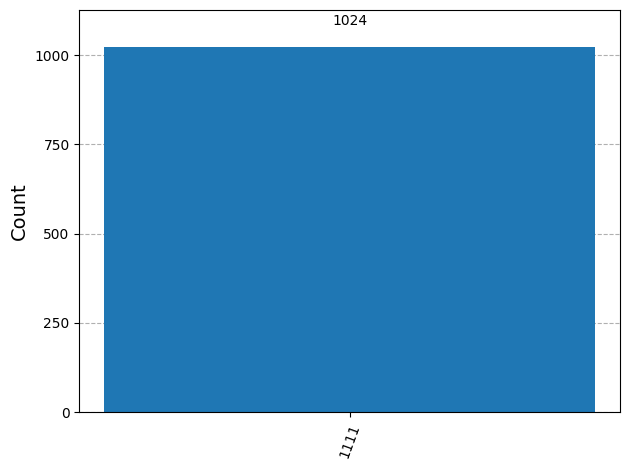

In [60]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

## 4. Bernstein-Vazirani Algorithm

In this part, we first introduce the Bernstein-Vazirani problem, its classical solution, and the quantum algorithm to solve it. We then implement the quantum algorithm using Qiskit and run it on a simulator.

The Bernstein-Vazirani algorithm, first introduced in Reference, can be seen as an extension of the Deutsch-Jozsa algorithm we covered in the last section. It showed that there can be advantages in using a quantum computer as a computational tool for more complex problems than the Deutsch-Jozsa problem.

### 4.1. The Bernstein-Vazirani Problem

We are again given a black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:
$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$

Instead of the function being balanced or constant as in the Deutsch-Jozsa problem, now the function is guaranteed to return the bitwise product of the input with some string, $s$. In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. We are expected to find $s$. As a classical reversible circuit, the Bernstein-Vazirani oracle looks like this:
    
![screenshot_1743284532306.png](<https://media-hosting.imagekit.io/2ba96cfd1b144cf5/screenshot_1743284532306.png?Expires=1837892532&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=QWQDWkkKyFlD9aUkNvg2A75l9um3~uzzI9O6dPu3BIDUWEAMBwV9tQnYikyQQSsjRxhknH-9qfMk-w1HfogGqiSQg258s3GHWkqVaBQvb57qjSeaJNSPOBcmK0aFX1puuuSePYwAQ4qbFmk~9CgahxdiLcxmjBRZmFdQgB46wzT~XKUHl4AuPuGAb9ojYMgixWHUFbvVbjHRrkVFVOKsqRTJx3-OF7JxfUWY7ZqNgyU4MGSNrxaQYRrcwgw~5mQyEzrhrCXAs0tYAx~~zIrvPchf5gOpsCuhijlTCc3B4dBJaggXz4-K670HozRSNRvnp8bZvjpYmPhauLl7zvxP9A__>)


### 4.2. The Classical Solution <a id='classical-solution'> </a>

Classically, the oracle returns:
$$f_s(x) = s \cdot x \mod 2$$
given an input $x$. Thus, the hidden bit string $s$ can be revealed by querying the oracle with the sequence of inputs:

|Input(x)|
|:-----:|
|100...0|
|010...0|
|001...0|
|000...1|

Where each query reveals a different bit of $s$ (the bit $s_i$). For example, with `x = 1000...0` one can obtain the least significant bit of $s$, with `x = 0100...0` we can find the next least significant, and so on. This means we would need to call the function $f_s(x)$, $n$ times.

### 4.3. The Quantum Solution <a id='quantum-solution'> </a>

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$. The quantum Bernstein-Vazirani algorithm to find the hidden bit string is very simple:

1. Initialize the inputs qubits to the $|0\rangle^{\otimes n}$ state, and output qubit to $|{-}\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure


![screenshot_1743284560748.png](<https://media-hosting.imagekit.io/67c3ab072f244eb5/screenshot_1743284560748.png?Expires=1837892560&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=Ov19ZUndBpcQVCNlfZh0K6CE8T2rFGf5wE1RFTrL3iN3HJ4cMWceZU0Ea0vtdVnSYQtVC85b9RaDf744wnmEeGp5QX35-zDSoLe1hxihUmL0YoXn~ow-01cZgTIBbtP3trRWP4NPel2JN3BQdeAT2iVz7kKUzk35F4gZH6WQoHB4UMQ1xORL-IPZ-rz0RkkfMxIet64-MKtjY2KVqZy7GH2xWg3-Bc~tUNKcgRysFTrmawmKd~tMEYeosewsjHaQC5pMIvKOxRiGo1-hlcTvhpN31iLeWM520qYSX-DBEzfLhrQ~mDA3BaDNzz3nyDv7Kq-cBk4RjU-gEpONU6c9Xg__>)

To explain the algorithm, let’s look more closely at what happens when we apply a H-gate to each qubit. If we have an $n$-qubit state, $|a\rangle$, and apply the H-gates, we will see the transformation:

$$
|a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle.
$$


We remember the Hadamard performs the following transformations on one qubit:

$$ H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$
$$ H|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) $$

Using summation notation, we could rewrite it like this:

$$ H|a\rangle = \frac{1}{\sqrt{2}}\sum_{x\in \{0,1\}} (-1)^{a\cdot x}|x\rangle. $$

For two qubits, applying a Hadamard to each performs the following transformations:

$$ H^{\otimes 2}|00\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$
$$ H^{\otimes 2}|01\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle) $$
$$ H^{\otimes 2}|10\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$
$$ H^{\otimes 2}|11\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) $$

We can express this using the summation below:

$$ H^{\otimes 2}|a\rangle = \frac{1}{2}\sum_{x\in \{0,1\}^2} (-1)^{a\cdot x}|x\rangle $$

You will hopefully now see how we arrive at the equation above.
</details>


In particular, when we start with a quantum register $|00\dots 0\rangle$ and apply $n$ Hadamard gates to it, we have the familiar quantum superposition:

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle
$$

In this case, the phase term $(-1)^{a\cdot x}$ disappears, since $a=0$, and thus $(-1)^{a\cdot x} = 1$.

The classical oracle $f_s$ returns $1$ for any input $x$ such that $s \cdot x\mod 2 = 1$, and returns $0$ otherwise. If we use the same phase kickback trick from the Deutsch-Jozsa algorithm and act on a qubit in the state $|{-}\rangle$, we get the following transformation:

$$
|x \rangle \xrightarrow{f_s} (-1)^{s\cdot x} |x \rangle
$$

The algorithm to reveal the hidden bit string follows naturally by querying the quantum oracle $f_s$ with the quantum superposition obtained from the Hadamard transformation of $|00\dots 0\rangle$. Namely,

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle
$$

Because the inverse of the $n$ Hadamard gates is again the $n$ Hadamard gates, we can obtain $a$ by

$$
\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^{\otimes n}} |a\rangle
$$

## 4.4. Example Bernstein-Vazarani Algorithm

Let's go through a specific example for $n=2$ qubits and a secret string $s=11$. Note that we are following the formulation in Reference [2] that generates a circuit for the Bernstein-Vazirani quantum oracle using only one register.

<ol>
    <li> The register of two qubits is initialized to zero:
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$


   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$


   </li>

   <li> For the string $s=11$, the quantum oracle performs the operation:
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle.
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$


   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$


   </li>

   <li> Measure to find the secret string $s=11$
   </li>


</ol>

Use the widget `bv_widget` below. Press the buttons to apply the different steps, and try to follow the algorithm through. You can change the number of input qubits and the value of the secret string through the first two positional arguments.

### 4.5. Qiskit Implementation of Bernstein-Vazirani Algorithm

We'll now walk through the Bernstein-Vazirani algorithm implementation in Qiskit for a three bit function with $s=011$.

We first set the number of qubits used in the experiment, and the hidden bit string $s$ to be found by the algorithm. The hidden bit string $s$ determines the circuit for the quantum oracle.

In [ ]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

We then use Qiskit to program the Bernstein-Vazirani algorithm.

In [ ]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Apply barrier
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.id(q)
    else:
        bv_circuit.cx(q, n)

# Apply barrier
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw(output='mpl')

We can run the above circuit on the simulator.

In [ ]:
# use local simulator
aer_sim = AerSimulator()
shots = 1024
results = aer_sim.run(bv_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

We can see that the result of the measurement is the hidden string `011`.

## 5. Simon's Algorithm

## 5.1. Introduction

Simon's algorithm, first introduced in Reference [1], was the first quantum algorithm to show an exponential speed-up versus the best classical algorithm in solving a specific problem. This inspired the quantum algorithms based on the quantum Fourier transform, which is used in the most famous quantum algorithm: Shor's factoring algorithm.

### 5.2. Simon's Problem

We are given an unknown blackbox function $f$, which is guaranteed to be either one-to-one ($1:1$) or two-to-one ($2:1$), where one-to-one and two-to-one functions have the following properties:

- **one-to-one**: maps exactly one unique output for every input. An example with a function that takes 4 inputs is:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 3, \quad f(4) \rightarrow 4$$

- **two-to-one**: maps exactly two inputs to every unique output. An example with a function that takes 4 inputs is:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 1, \quad f(4) \rightarrow 2$$

This two-to-one mapping is according to a hidden bitstring, $b$, where:

$$
\textrm{given }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{it is guaranteed }: \quad x_1 \oplus x_2 = b
$$

Given this blackbox $f$, how quickly can we determine if $f$ is one-to-one or two-to-one? Then, if $f$ turns out to be two-to-one, how quickly can we determine $b$? As it turns out, both cases boil down to the same problem of finding $b$, where a bitstring of $b={000...}$ represents the one-to-one $f$.

### 5.3. Simon's Algorithm

#### Classical Solution

Classically, if we want to know what $b$ is with 100% certainty for a given $f$, we have to check up to $2^{n−1}+1$  inputs, where n is the number of bits in the input. This means checking just over half of all the possible inputs until we find two cases of the same output. Much like the Deutsch-Jozsa problem, if we get lucky, we could solve the problem with our first two tries. But if we happen to get an $f$ that is one-to-one, or get _really_ unlucky with an $f$ that’s two-to-one, then we’re stuck with the full $2^{n−1}+1$.
There are known algorithms that have a lower bound of $\Omega(2^{n/2})$ (see Reference 2 below), but generally speaking the complexity grows exponentially with n.

#### Quantum Solution

The quantum circuit that implements Simon's algorithm is shown below.

![screenshot_1743321007537.png](<https://media-hosting.imagekit.io/a2310ac759e44056/screenshot_1743321007537.png?Expires=1837929007&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=yv~qgVWP-4kpfyiTBRfr4VsoyxT2bhx7de1iWSjg1qRt2AbDDxaLvLbaLeprZV-M~-6ZMU7XB5wItJjXHyAU7p74RxbPcDcSWHxWWotnigmu0hffKWZvyT92LceWBJWw8mO7pdeF-qbalJthFR6-645rTjOjdVitvWo-7KSLhT6KYwVjD--KDs0cQvaQKIDQQvPV3aKcdDZtwMOITIMVK~GG~kVvneHMOJpCYk1hMg51r1ZiO2-fKFqkk2KgoICCUIxUyXbOEyWIFZXouBUT0sxLFA8ttPW0r-QmFNidwlb4BqEWAVnhhlUjcqkW8QInUXmOnXsjF7GDB-xzDFz2jw__>)

Where the query function, $\text{Q}_f$ acts on two quantum registers as:


$$ \lvert x \rangle \lvert a \rangle \rightarrow \lvert x \rangle \lvert a \oplus f(x) \rangle $$

In the specific case that the second register is in the state $|0\rangle = |00\dots0\rangle$ we have:

$$ \lvert x \rangle \lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$

The algorithm involves the following steps.

1. Two $n$-qubit input registers are initialized to the zero state:

   $$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$

2. Apply a Hadamard transform to the first register:

   $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle\lvert 0 \rangle^{\otimes n}  $$

3. Apply the query function $\text{Q}_f$:
    
   $$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle \lvert f(x) \rangle $$

4. Measure the second register. A certain value of $f(x)$ will be observed. Because of the setting of the problem, the observed value $f(x)$ could correspond to two possible inputs: $x$ and $y = x \oplus b $. Therefore the first register becomes:

   $$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert x \rangle + \lvert y \rangle \right)$$

   where we omitted the second register since it has been measured.

5. Apply Hadamard on the first register:

   $$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$

6. Measuring the first register will give an output only if:

   $$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$
   which means:
   
   $$
   x \cdot z = y \cdot z \\
   x \cdot z = \left( x \oplus b \right) \cdot z \\
   x \cdot z = x \cdot z \oplus b \cdot z \\
   b \cdot z = 0 \text{ (mod 2)}
   $$
   
   A string $z$ will be measured, whose inner product with $b = 0$. Thus, repeating the algorithm $\approx n$ times, we will be able to obtain $n$ different values of $z$ and the following system of equation can be written:
   
   $$ \begin{cases} b \cdot z_1 = 0 \\ b \cdot z_2 = 0 \\ \quad \vdots \\ b \cdot z_n = 0 \end{cases}$$
   
   From which $b$ can be determined, for example by Gaussian elimination.

So, in this particular problem the quantum algorithm performs exponentially fewer steps than the classical one. Once again, it might be difficult to envision an application of this algorithm (although it inspired the most famous algorithm created by Shor) but it represents the first proof that there can be an exponential speed-up in solving a specific problem by using a quantum computer rather than a classical one.

## 5.4. Example of Simon Algorithm

Let's see the example of Simon's algorithm for 2 qubits with the secret string $b=11$, so that $f(x) = f(y)$ if $y = x \oplus b$. The quantum circuit to solve the problem is:

![screenshot_1743321031937.png](<https://media-hosting.imagekit.io/ba5e7fa886784388/screenshot_1743321031937.png?Expires=1837929031&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=DxMfFirThdOMFUsIp9dq48N7O~6rvhhyEowxfv6OVZ21E5HOqkRq2szwrEYO~XB1DpUdJtMod0laGqSEb7qu8utW8Ri6WwyyFDBrkRYfrI0XjVI3MOksadAvMEOXj4Lx9NEY8J4mjgMZTDLmpwV1FOjGp23lfboSzG8UDI6oN-YmAMbt5Khz0HNnRnfk25A4D71dnNAIbXckGTGttI1Q1JbZXo-hJEtWqiAjYMkgoM6Sc7XB3SpvQec9Sx6HVAVQaZBCe-FcJ8nMYK60YwlpF8uEfvc5254LrzNLMJm6NoaXq1RW0FwQnu~7zPVobKCPuonc4SMVVFPuVL-ZRTmF7A__>)

1. Two $2$-qubit input registers are initialized to the zero state:
   
   $$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$

2. Apply Hadamard gates to the qubits in the first register:
   
   $$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$

3. For the string $b=11$, the query function can be implemented as `$\text{Q}_f = CX_{1_a 2_a}CX_{1_a 2_b}CX_{1_b 2_a}CX_{1_b 2_b}$` (as seen in the circuit diagram above):
    
   $$
   \begin{aligned}
   \lvert \psi_3 \rangle  = \frac{1}{2} ( \;
     & \lvert 0 0 \rangle_1 \; \lvert 0\oplus 0 \oplus 0, & 0 \oplus 0 \oplus 0 \rangle_2 &\\[5pt]
   + & \lvert 0 1 \rangle_1 \; \lvert 0\oplus 0 \oplus 1, & 0 \oplus 0 \oplus 1 \rangle_2 &\\[6pt]
   + & \lvert 1 0 \rangle_1 \; \lvert 0\oplus 1 \oplus 0, & 0 \oplus 1 \oplus 0 \rangle_2 &\\[6pt]
   + & \lvert 1 1 \rangle_1 \; \lvert 0\oplus 1 \oplus 1, & 0 \oplus 1 \oplus 1 \rangle_2 & \; )\\
   \end{aligned}
   $$
  
   Thus:    

   $$
   \begin{aligned}
   \lvert \psi_3 \rangle = \frac{1}{2} ( \quad
   & \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 & \\[6pt]
   + & \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 & \\[6pt]
   + & \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 & \\[6pt]
   + & \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 & \; )\\
   \end{aligned}
   $$    

4. We measure the second register. With $50\%$ probability we will see either $\lvert  0   0  \rangle_2$ or $\lvert  1   1  \rangle_2$. For the sake of the example, let us assume that we see $\lvert  1   1  \rangle_2$. The state of the system is then
   $$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert  0   1  \rangle_1 + \lvert  1   0  \rangle_1 \right)  $$
   where we omitted the second register since it has been measured.
    
5. Apply Hadamard on the first register
   $$ \lvert \psi_5 \rangle = \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right)  \right] \\
   =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle - \lvert 0 1 \rangle + \lvert 1 0 \rangle - \lvert 1 1 \rangle    + \lvert 0 0 \rangle + \lvert 0 1 \rangle - \lvert 1 0 \rangle - \lvert 1 1 \rangle \right] \\
   = \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle - \lvert 1 1 \rangle \right)$$
    
6. Measuring the first register will give either $\lvert 0 0 \rangle$ or $\lvert 1 1 \rangle$ with equal probability.

7. If we see $\lvert 1 1 \rangle$, then:   

   $$ b \cdot 11 = 0 $$

   which tells us that $b \neq 01$ or $10$, and the two remaining potential solutions are $b = 00$ or $b = 11$. Note that $b = 00$ will always be a trivial solution to our simultaneous equations. If we repeat steps 1-6 many times, we would only measure $|00\rangle$ or $|11\rangle$ as

   $$ b \cdot 11 = 0 $$
   $$ b \cdot 00 = 0 $$
        
   are the only equations that satisfy $b=11$. We can verify $b=11$ by picking a random input ($x_i$) and checking    $f(x_i) = f(x_i \oplus b)$. For example:

   $$ 01 \oplus b = 10 $$
   $$ f(01) = f(10) = 11$$

## 5.5. Qiskit Implementation of Simons Algorithm

We now implement Simon's algorithm for an example with $3$-qubits and $b=110$.

In [ ]:
def simon_oracle(secret_string):
    """
    Custom-built oracle for Simon's algorithm that enforces f(x) = f(x ⊕ s).
    This version is a teaching example and not general-purpose.
    """
    n = len(secret_string)
    qc = QuantumCircuit(2 * n)

    # Copy input qubits to output (simple f(x) = x)
    for i in range(n):
        qc.cx(i, i + n)

    # Add some dependence based on secret string
    for i, bit in enumerate(secret_string):
        if bit == '1':
            qc.cx(i, (i + 1) % n + n)

    return qc

In [ ]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))

# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output = 'mpl')

In [ ]:
# use local simulator
aer_sim = AerSimulator()
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

Using these results, we can recover the value of $b = 110$ by solving this set of simultaneous equations. For example, say we first measured `001`, this tells us:

$$
\require{cancel}
\begin{aligned}
b \cdot 001 &= 0 \\
(b_2 \cdot 0) + (b_1 \cdot 0) + (b_0 \cdot 1) & = 0 \\
(\cancel{b_2 \cdot 0}) + (\cancel{b_1 \cdot 0}) + (b_0 \cdot 1) & = 0 \\
b_0 & = 0\\
\end{aligned}
$$

If we next measured `111`, we have:

$$
\require{cancel}
\begin{aligned}
b \cdot 111 &= 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) + (\cancel{0 \cdot 1}) & = 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) & = 0 \\
\end{aligned}
$$

Which tells us either:

$$ b_2 = b_1 = 0, \quad b = 000 $$

or

$$ b_2 = b_1 = 1, \quad b = 110 $$

Of which $b  = 110$ is the non-trivial solution to our simultaneous equations.

## 5.6. Oracle

The above example and implementation of Simon's algorithm are specifically for specific values of $b$. To extend the problem to other secret bit strings, we need to discuss the Simon query function or oracle in more detail.

The Simon algorithm deals with finding a hidden bitstring $b \in \{0,1\}^n$ from an oracle $f_b$ that satisfies $f_b(x) = f_b(y)$ if and only if $y = x \oplus b$ for all $x \in \{0,1\}^n$.  Here, the $\oplus$ is the bitwise XOR operation. Thus, if $b = 0\ldots 0$, i.e., the all-zero bitstring, then $f_b$ is a 1-to-1 (or, permutation) function. Otherwise, if $b \neq 0\ldots 0$, then $f_b$ is a 2-to-1 function.

In the algorithm, the oracle receives $|x\rangle|0\rangle$ as input. With regards to a predetermined $b$, the oracle writes its output to the second register so that it transforms the input to $|x\rangle|f_b(x)\rangle$ such that $f(x) = f(x\oplus b)$ for all $x \in \{0,1\}^n$.

Such a blackbox function can be realized by the following procedures.

-  Copy the content of the first register to the second register.
$$
|x\rangle|0\rangle \rightarrow |x\rangle|x\rangle
$$

-  **(Creating 1-to-1 or 2-to-1 mapping)** If $b$ is not all-zero, then there is the least index $j$ so that $b_j = 1$. If $x_j = 0$, then XOR the second register with $b$. Otherwise, do not change the second register.
$$
|x\rangle|x\rangle \rightarrow |x\rangle|x \oplus b\rangle~\mbox{if}~x_j = 0~\mbox{for the least index j}
$$

-  **(Creating random permutation)** Randomly permute and flip the qubits of the second register.
$$
|x\rangle|y\rangle \rightarrow |x\rangle|f_b(y)\rangle
$$



---


# Tasks



---



## Task 1.

### Extend Superdense Coding to 2 Bell Pairs
Implement and simulate a generalized superdense coding protocol using 2 Bell pairs, allowing Alice to send 4 classical bits to Bob by sending only 2 qubits.
Steps:
1. Bell Pair Creation: create a circuit that prepares 2 Bell pairs, i.e., 4 qubits in total — qubits 0 and 1 form the first Bell pair, and qubits 2 and 3 form the second.

2. Message Encoding: define a function `encode_4bit_message(qc, msg)` where msg is a 4-bit binary string (e.g. "1011"). Use combinations of X and Z gates on Alice's qubits (1 and 3) to encode the message.
Hint: First two bits encode on qubit 1, next two bits on qubit 3 using the original superdense coding method.

3. Message Decoding: Bob receives the two qubits from Alice (qubits 1 and 3). He then performs the decoding sequence (CNOT + H) for each Bell pair (on qubits 0 and 1, and 2 and 3).

4. Measurement & Result Interpretation: Add measurements for all 4 qubits and use plot_histogram to visualize the result. The most probable measurement outcome should match the original 4-bit message.





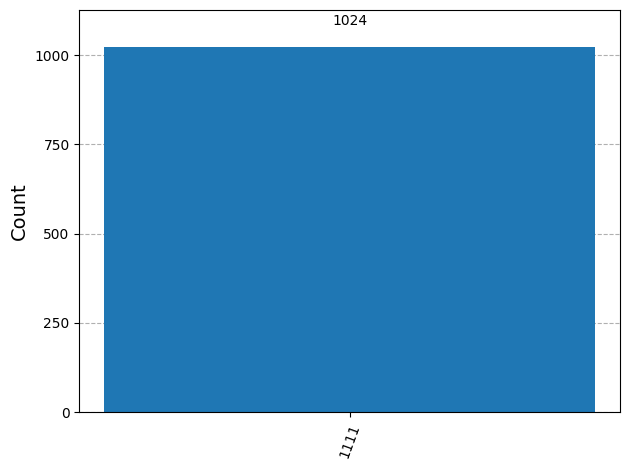

In [71]:
def encode_4bit_message(qc, msg):
    if len(msg) != 4:
        raise ValueError("Message must be a 4-bit string")

    if msg[0] == '1':
        qc.z(1)
    if msg[1] == '1':
        qc.x(1)

    if msg[2] == '1':
        qc.z(3)
    if msg[3] == '1':
        qc.x(3)

qc = QuantumCircuit(4, 4)

qc.h(1)
qc.cx(1, 0)
qc.h(3)
qc.cx(3, 2)

message = "1111"
encode_4bit_message(qc, message)

qc.cx(1, 0)
qc.h(1)
qc.cx(3, 2)
qc.h(3)

qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)

plot_histogram(counts)


## Task 2.

### Deutsch-Jozsa Algorithm

Determine whether a given oracle implements a constant or balanced function using the Deutsch-Jozsa algorithm. Implement the Deutsch-Jozsa algorithm for a 3-qubit input register (i.e., total 4 qubits with the auxiliary qubit).

1. Create two oracles:
* One constant oracle (e.g., always returns 0)
* One balanced oracle (e.g., returns 1 for half of the inputs)

2. Apply the algorithm to both oracles and measure the output.



In [97]:
def constant_oracle(qc, n):
    return qc

def balanced_oracle(qc, n):
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    return qc

def deutsch_jozsa(oracle, n):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))

    qc = oracle(qc, n)

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

n = 3
constant_circuit = deutsch_jozsa(constant_oracle, n)
simulator = AerSimulator()
job = simulator.run(constant_circuit, shots=1024)
result = job.result()
counts_constant = result.get_counts(constant_circuit)
print("Constant Oracle Results:", counts_constant)

balanced_circuit = deutsch_jozsa(balanced_oracle, n)
job = simulator.run(balanced_circuit, shots=1024)
result = job.result()
counts_balanced = result.get_counts(balanced_circuit)
print("Balanced Oracle Results:", counts_balanced)


Constant Oracle Results: {'000': 1024}
Balanced Oracle Results: {'111': 1024}


## Task 3.

### Bernstein-Vazirani Algorithm

Use the Bernstein-Vazirani algorithm to find a hidden binary string s with only one query to the oracle.

Steps:
1. Implement the Bernstein-Vazirani algorithm for n = 4.
2. Create an oracle for a chosen hidden string s (e.g., '1101').
3. Apply the algorithm and run the circuit.
4. Extract the value of s from the measurement result.

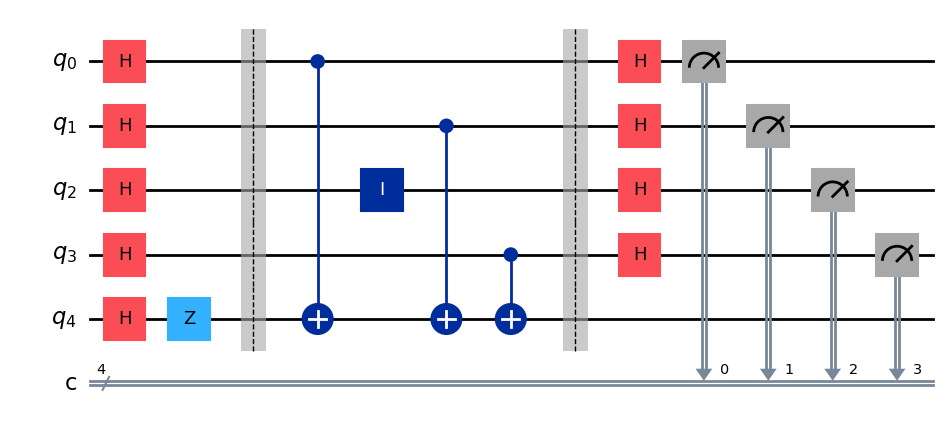

In [85]:
n = 4
s = '1101'

bv_circuit = QuantumCircuit(n+1, n)

bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier()

for q in range(n):
    if s[q] == '0':
        bv_circuit.id(q)
    else:
        bv_circuit.cx(q, n)

bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)

for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw(output='mpl')

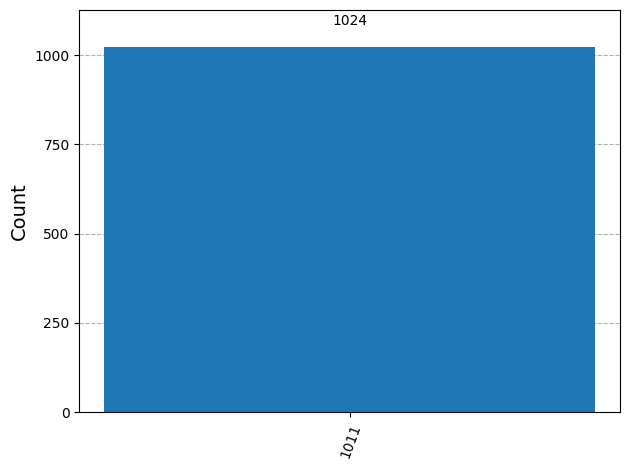

In [86]:
aer_sim = AerSimulator()
shots = 1024
results = aer_sim.run(bv_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

## Task 4.

### Simon’s Algorithm

Use Simon’s algorithm to find the secret string s such that f(x) = f(x ⊕ s) for a 2-to-1 function.

Stepss:
1. Implement Simon’s algorithm with n = 3 qubits.
2. Create a custom 2-to-1 oracle that hides a secret string s, such as '101'.
3. Run the algorithm several times to collect linearly independent equations.
4. Use classical post-processing (e.g., solving a system of linear equations mod 2) to recover the hidden string s.

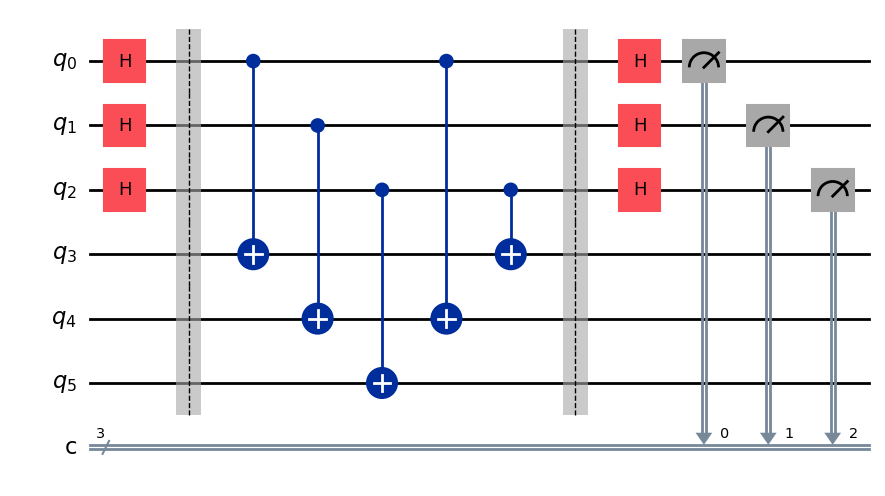

In [94]:
def simon_oracle(secret_string):
    n = len(secret_string)
    qc = QuantumCircuit(2 * n)

    for i in range(n):
        qc.cx(i, i + n)

    for i, bit in enumerate(secret_string):
        if bit == '1':
            qc.cx(i, (i + 1) % n + n)
    return qc

def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

n = 3
s = '101'

simon_circuit = QuantumCircuit(2 * n, n)

simon_circuit.h(range(n))

simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(s))

simon_circuit.barrier()

simon_circuit.h(range(n))

simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output = 'mpl')


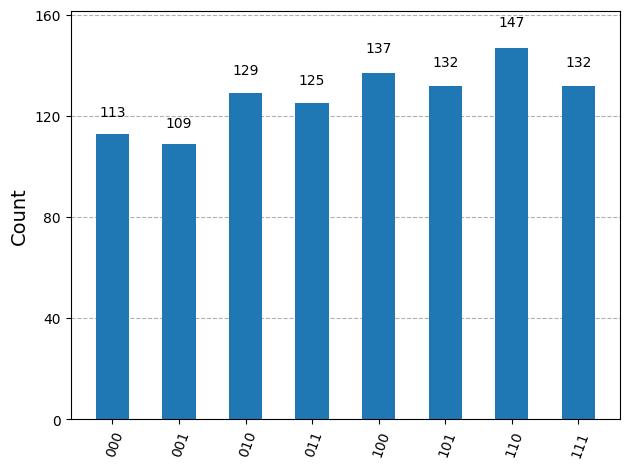

In [95]:
aer_sim = AerSimulator()
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()

plot_histogram(counts)

In [96]:
for z in counts:
    print( '{}.{} = {} (mod 2)'.format(s, z, bdotz(s,z)) )

101.001 = 1 (mod 2)
101.101 = 0 (mod 2)
101.000 = 0 (mod 2)
101.010 = 0 (mod 2)
101.011 = 1 (mod 2)
101.111 = 0 (mod 2)
101.100 = 1 (mod 2)
101.110 = 1 (mod 2)
